# Proof that VZ-gate works in SU(3)

In [2]:
from sympy import *
from sympy.physics.quantum import *
import numpy as np

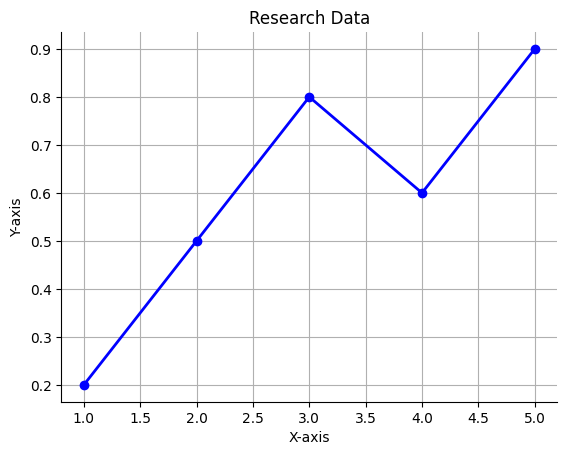

In [3]:
import matplotlib.pyplot as plt

# Data
x = [1, 2, 3, 4, 5]
y = [0.2, 0.5, 0.8, 0.6, 0.9]

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the line graph
ax.plot(x, y, color='blue', marker='o', linestyle='-', linewidth=2)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Research Data')

# Customize the appearance
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the graph as an image file
plt.savefig('research_graph.png', dpi=300)

# Show the graph
plt.show()

In [2]:
Id2 = diag(1,1)
Id3 = diag(1,1,1)

theta = Symbol('theta')
phi = Symbol('phi')

Qubit case

In [3]:
sigma_x = Matrix([
    [0, 1],
    [1, 0]
])

sigma_y = Matrix([
    [0, -I],
    [I, 0]
])

sigma_z = Matrix([
    [1, 0],
    [0, -1]
])

In [4]:
X2 = Id2*cos(theta/2) - I*sin(theta/2)*sigma_x

X2

Matrix([
[   cos(theta/2), -I*sin(theta/2)],
[-I*sin(theta/2),    cos(theta/2)]])

In [5]:
Y2 = Id2*cos(theta/2) - I*sin(theta/2)*sigma_y

Y2

Matrix([
[cos(theta/2), -sin(theta/2)],
[sin(theta/2),  cos(theta/2)]])

In [6]:
Z2 = Id2*cos(phi/2) - I*sin(phi/2)*sigma_z

for i in range(4):
    Z2[i] = simplify(Z2[i])

Z2

Matrix([
[exp(-I*phi/2),            0],
[            0, exp(I*phi/2)]])

In [7]:
M = cos(phi)*sigma_x + sin(phi)*sigma_y

for i in range(4):
    M[i] = simplify(M[i])

U3 = Id2*cos(theta/2) - I*sin(theta/2)*M

for i in range(4):
    U3[i] = simplify(U3[i])

U3

Matrix([
[              cos(theta/2), -I*exp(-I*phi)*sin(theta/2)],
[-I*exp(I*phi)*sin(theta/2),                cos(theta/2)]])

In [8]:
def Z2f(phi):
    return Matrix([
        [exp(-I*phi/2), 0],
        [0, exp(I*phi/2)]
    ])

def X2f(theta):
    return Matrix([
        [cos(theta/2), -I*sin(theta/2)],
        [-I*sin(theta/2), cos(theta/2)]
    ])

In [9]:
U3_decomposed = Z2f(phi)*X2f(theta)*Z2f(-phi)

U3_decomposed

Matrix([
[              cos(theta/2), -I*exp(-I*phi)*sin(theta/2)],
[-I*exp(I*phi)*sin(theta/2),                cos(theta/2)]])

In [10]:
U3_decomposed - U3 

Matrix([
[0, 0],
[0, 0]])

Qutrit case

In 01 subspace

In [11]:
gm01x = Matrix([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 0]
])

gm01x

Matrix([
[0, 1, 0],
[1, 0, 0],
[0, 0, 0]])

In [12]:
gm01y = Matrix([
    [0, -I, 0],
    [I, 0, 0],
    [0, 0, 0]
])

gm01y

Matrix([
[0, -I, 0],
[I,  0, 0],
[0,  0, 0]])

In [13]:
gm01z = Matrix([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 0]
])

gm01z

Matrix([
[1,  0, 0],
[0, -1, 0],
[0,  0, 0]])

Theorem: Any matrix H that is a normalized linear combination of Gell-Mann subspace matrices, i.e. (1-3) or (4-7) satisfies

\begin{align}
\exp(-i(\theta/2)H)= I - iH\sin(\theta/2) + H^2(\cos(\theta/2)-1)
\end{align}

Corollary: Any Gell-Mann matrix satisfies the theorem above.

https://arxiv.org/pdf/1508.00868.pdf

In [14]:
H3 = cos(phi)*gm01x + sin(phi)*gm01y

for i in range(9):
    H3[i] = simplify(H3[i])

H3

Matrix([
[         0, exp(-I*phi), 0],
[exp(I*phi),           0, 0],
[         0,           0, 0]])

In [15]:
eH3 = Id3 - I*H3*sin(theta/2) + H3**2*(cos(theta/2)-1)

for i in range(9):
    eH3[i] = simplify(eH3[i])
    
eH3

Matrix([
[              cos(theta/2), -I*exp(-I*phi)*sin(theta/2), 0],
[-I*exp(I*phi)*sin(theta/2),                cos(theta/2), 0],
[                         0,                           0, 1]])

In [16]:
Y = Id3 - I*gm01y*sin(theta/2) + gm01y**2*(cos(theta/2)-1)

for i in range(9):
    Y[i] = simplify(Y[i])
    
Y

Matrix([
[cos(theta/2), -sin(theta/2), 0],
[sin(theta/2),  cos(theta/2), 0],
[           0,             0, 1]])

In [17]:
X3 = Id3 - I*gm01x*sin(theta/2) + gm01x**2*(cos(theta/2)-1)

for i in range(9):
    X3[i] = simplify(X3[i])
    
X3

Matrix([
[   cos(theta/2), -I*sin(theta/2), 0],
[-I*sin(theta/2),    cos(theta/2), 0],
[              0,               0, 1]])

In [18]:
Z3 = Id3 - I*gm01z*sin(phi/2) + gm01z**2*(cos(phi/2)-1)

for i in range(9):
    Z3[i] = simplify(Z3[i])
    
Z3

Matrix([
[exp(-I*phi/2),            0, 0],
[            0, exp(I*phi/2), 0],
[            0,            0, 1]])

In [36]:
def X3f(theta):
    return Matrix([
        [cos(theta/2), -I*sin(theta/2), 0],
        [-I*sin(theta/2), cos(theta/2), 0],
        [0, 0, 1]
    ])

def Z3f(phi):
    return Matrix([
        [exp(-I*phi/2), 0, 0],
        [0, exp(I*phi/2), 0],
        [0, 0, 1]
    ])

def weirdZ(phi):
    return Matrix([
        [exp(I*phi), 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])

In [39]:
np.angle(1)

0.0

In [38]:
weirdZ(-phi)*X3f(theta)*weirdZ(phi)

Matrix([
[              cos(theta/2), -I*exp(-I*phi)*sin(theta/2), 0],
[-I*exp(I*phi)*sin(theta/2),                cos(theta/2), 0],
[                         0,                           0, 1]])

In [20]:
Z3f(-pi)*X3f(theta)*Z3f(pi) - X3f(-theta)

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [21]:
SU3_decomposed = Z3f(phi)*X3f(theta)*Z3f(-phi)

SU3_decomposed

Matrix([
[              cos(theta/2), -I*exp(-I*phi)*sin(theta/2), 0],
[-I*exp(I*phi)*sin(theta/2),                cos(theta/2), 0],
[                         0,                           0, 1]])

In [22]:
SU3_decomposed - eH3

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

which conclude the proof in 01 subspace (QED). For 12, the situation is more complicated. We must substitute the generator of Z rotation in 12 subspace by a matrix that is not a Gell-Mann matrix but can generate the rotation we want. If we were to apply the same technique as in the 01 subspace, we can see that

In [23]:
gm12x = Matrix([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0]
])

gm12x

Matrix([
[0, 0, 0],
[0, 0, 1],
[0, 1, 0]])

In [24]:
gm12y = Matrix([
    [0, 0, 0],
    [0, 0, -I],
    [0, I, 0]
])

gm12y

Matrix([
[0, 0,  0],
[0, 0, -I],
[0, I,  0]])

In [25]:
gm12z = Matrix([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, -1]
])

gm12z

Matrix([
[0, 0,  0],
[0, 1,  0],
[0, 0, -1]])

In [26]:
X3 = Id3 - I*gm12x*sin(theta/2) + gm12x**2*(cos(theta/2)-1)

X3

Matrix([
[1,               0,               0],
[0,    cos(theta/2), -I*sin(theta/2)],
[0, -I*sin(theta/2),    cos(theta/2)]])

In [27]:
def X3f(theta):
    return Matrix([
        [1, 0, 0],
        [0, cos(theta/2), -I*sin(theta/2)],
        [0, -I*sin(theta/2), cos(theta/2)]
    ])

In [28]:
Z3 = Id3 - I*gm12z*sin(phi/2) + gm12z**2*(cos(phi/2)-1)

for i in range(9):
    Z3[i] = simplify(Z3[i])

Z3

Matrix([
[1,             0,            0],
[0, exp(-I*phi/2),            0],
[0,             0, exp(I*phi/2)]])

In [29]:
def Z3f(phi):
    return Matrix([
        [1, 0, 0],
        [0, exp(-I*phi/2), 0],
        [0, 0, exp(I*phi/2)]
    ])

In [30]:
H3 = cos(phi)*gm12x + sin(phi)*gm12y

for i in range(9):
    H3[i] = simplify(H3[i])
H3

Matrix([
[0,          0,           0],
[0,          0, exp(-I*phi)],
[0, exp(I*phi),           0]])

Because this matrix is a linear combination of Gell-Mann matrices in the 12 subspace, the theorem holds.

In [31]:
eH3 = Id3 - I*H3*sin(theta/2) + H3**2*(cos(theta/2)-1)

for i in range(9):
    eH3[i] = simplify(eH3[i])

eH3

Matrix([
[1,                          0,                           0],
[0,               cos(theta/2), -I*exp(-I*phi)*sin(theta/2)],
[0, -I*exp(I*phi)*sin(theta/2),                cos(theta/2)]])

In [32]:
eH3 - Z3f(phi)*X3f(theta)*Z3f(-phi)

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])